In [7]:
from functools import partial

import astropy.units as u
import matplotlib.pyplot as plt
from astropy.time import Time
from astropy.table import QTable, vstack
from skimage.measure import regionprops, label, regionprops_table
from skimage.color import label2rgb

import sunpy.map

In [8]:
maps = sunpy.map.Map("/Users/priyanujkashyap/Documents/GitHub/KWS24/sunspot_handson/hmi_ic_*fits")
maps = [m.resample((1024, 1024) * u.pix) for m in maps]

In [9]:
import sys
# Append the directory to your python path using sys
sys.path.append('/Users/priyanujkashyap/Documents/GitHub/KWS24/sunspot_handson/kodai_stara')
# Import the module
from stara import stara

In [10]:
segs = list(map(partial(stara, limb_filter=10 * u.percent), maps))

In [11]:
def get_regions(segmentation, smap):
    labelled = label(segmentation)
    if labelled.max() == 0:
        return QTable()

    regions = regionprops_table(labelled, smap.data,
                                properties=["label",
                                            "centroid",
                                            "area",
                                            "min_intensity"])

    regions['obstime'] = Time([smap.date] * regions['label'].size)
    regions['center_coord'] = smap.pixel_to_world(regions['centroid-0'] * u.pix,
                                                  regions['centroid-1'] * u.pix).heliographic_stonyhurst

    return QTable(regions)


print(list(map(get_regions, segs, maps)))

[<QTable length=1274>
label ...                       center_coord                      
      ...                        deg,deg,m                        
int64 ...                         SkyCoord                        
----- ... --------------------------------------------------------
    1 ...   41.42649199777541,-2.922171833144708,695999999.9932985
    2 ...   39.54708966423394,-14.26680375110119,695999999.9998115
    3 ... 36.694482902090044,-10.159898049980983,696000000.0030808
    4 ...   33.83119188113163,-16.338437668265776,695999999.997333
    5 ...    31.82768909968431,-3.703845031641354,696000000.002922
    6 ...  32.15293939737421,-10.347779545342503,696000000.0035133
    7 ...  33.10373307029651,-19.908466151335457,696000000.0026276
    8 ...  31.786510067804162,-14.71646831799601,695999999.9978513
    9 ...  31.275391274430014,13.557432797118652,696000000.0001566
  ... ...                                                      ...
 1265 ...  -57.88113739599959,24.4551801

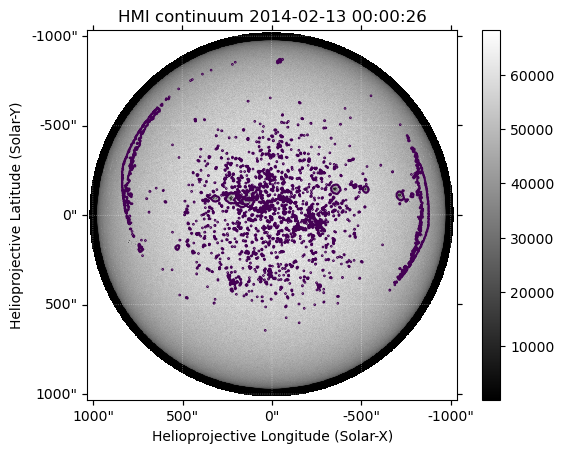

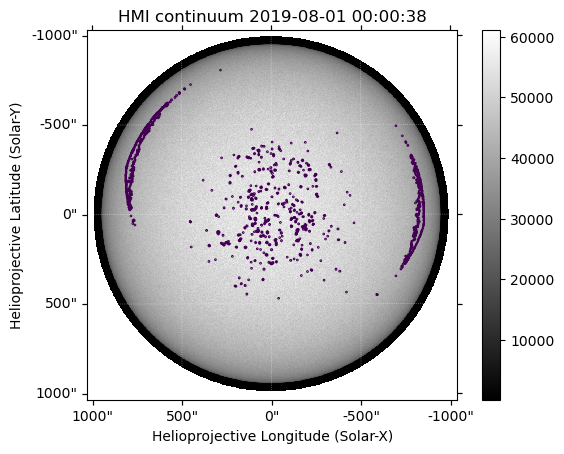

In [12]:
for smap, seg in zip(maps, segs):
  plt.figure()
  ax = plt.subplot(projection=smap)
  smap.plot()
  ax.contour(seg, levels=0)
  plt.colorbar()

plt.show()